In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('co2_.csv', header=None, low_memory=False)
# set columns name for the file, name from the paper
# 1.Record id - Increment record id (unique)
# 2.Linux timestamp- convert from linux timestamp to time format https://www.epochconverter.com/
# 3.CO2 concentration - in ppm (part per million)
# 4.Temperature - Temperature in °C
# 5.Humidity - (Humidity in percentage%)
# 6.Light intensity - Light Intensity, approx. 0 – 1000
# 7.Node ID Node 0, Node 1, and Node 9

columns_name = ['Record_id', 'Timestamp', 'CO2_concentration', 
                'Temperature', 'Humidity', 'Light_intensity', 'Node_ID']
df.columns = columns_name
df = df[df['Record_id'] != '6642641'] #wrong record
df = df.reset_index(drop=True)
df

,Record_id,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
0,4678229,1.533243e+09,2944,30.5,61.0,89,9.0
1,8267680,1.533200e+09,347,-100.0,63.8,24,0.0
2,8267681,1.533200e+09,287,27.6,63.8,25,0.0
3,8267682,1.533200e+09,296,27.6,63.8,24,0.0
4,8267683,1.533200e+09,301,27.6,63.8,24,0.0
...,...,...,...,...,...,...,...
6116510,14390026,1.539577e+09,244,27.0,65.5,574,1.0
6116511,14390027,1.539577e+09,244,27.0,65.5,574,1.0
6116512,14390035,1.539577e+09,246,27.0,65.5,138,1.0
6116513,14390036,1.539577e+09,246,27.0,65.5,138,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116515 entries, 0 to 6116514
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Record_id          object 
 1   Timestamp          float64
 2   CO2_concentration  object 
 3   Temperature        object 
 4   Humidity           object 
 5   Light_intensity    object 
 6   Node_ID            float64
dtypes: float64(2), object(5)
memory usage: 326.7+ MB


In [4]:
df.isnull().sum()

Record_id             589
Timestamp             553
CO2_concentration    1181
Temperature          1145
Humidity             1145
Light_intensity      1721
Node_ID              1734
dtype: int64

In [5]:
#directly drop Null, the total records from 6116515 to 6114709
df1 = df.dropna(subset=['Record_id', 'Timestamp', 'CO2_concentration', 
                        'Temperature', 'Humidity', 'Light_intensity', 'Node_ID'])
df1.isnull().sum()

Record_id            0
Timestamp            0
CO2_concentration    0
Temperature          0
Humidity             0
Light_intensity      0
Node_ID              0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6114709 entries, 0 to 6116514
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Record_id          object 
 1   Timestamp          float64
 2   CO2_concentration  object 
 3   Temperature        object 
 4   Humidity           object 
 5   Light_intensity    object 
 6   Node_ID            float64
dtypes: float64(2), object(5)
memory usage: 373.2+ MB


In [7]:
# there are some values include the e, such as 3.11533662154e+, 
# but python cound't identify it, so I delete it
pattern_with_e = r'.*e.*'

numeric_columns = ['CO2_concentration', 'Temperature', 'Humidity', 'Light_intensity']

for col in numeric_columns:
    df1 = df1[~df1[col].str.match(pattern_with_e)]

In [8]:
# convert Temperature dtype from object to float

df1[numeric_columns] = df1[numeric_columns].astype(float)

In [9]:
df1.head()

,Record_id,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
0,4678229,1.533243e+09,2944.0,30.5,61.0,89.0,9.0
1,8267680,1.533200e+09,347.0,-100.0,63.8,24.0,0.0
2,8267681,1.533200e+09,287.0,27.6,63.8,25.0,0.0
3,8267682,1.533200e+09,296.0,27.6,63.8,24.0,0.0
4,8267683,1.533200e+09,301.0,27.6,63.8,24.0,0.0


In [10]:
df1.describe()

,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
count,6.114700e+06,6.114700e+06,6.114700e+06,6.114700e+06,6.114700e+06,6.114700e+06
mean,1.536422e+09,6.508302e+06,6.783357e+04,1.074011e+05,8.323289e+05,3.009708e+00
std,1.885150e+06,1.118155e+10,4.108843e+07,7.073548e+07,8.481023e+08,3.887164e+00
min,1.533200e+09,0.000000e+00,-1.000000e+02,-2.800576e+06,0.000000e+00,0.000000e+00
25%,1.534740e+09,1.400000e+02,2.640000e+01,5.290000e+01,2.900000e+01,0.000000e+00
50%,1.536532e+09,2.020000e+02,2.830000e+01,6.410000e+01,1.390000e+02,1.000000e+00
75%,1.537907e+09,2.620000e+02,3.170000e+01,7.240000e+01,5.640000e+02,9.000000e+00
max,1.539577e+09,2.725154e+13,3.953952e+10,7.153706e+10,1.351536e+12,9.000000e+00


In [11]:
# clean imbalanced data or false data

df1 = df1[(df1['CO2_concentration'] > 0) & (df1['CO2_concentration'] < 5000)]
#450 ppm: average outdoor air level.

df1 = df1[(df1['Temperature'] < 40) & (df1['Temperature'] > 10)]

df1 = df1[(df1['Humidity'] < 100) & (df1['Humidity'] > 20)]

df1 = df1[df1['Light_intensity'] < 800]


In [12]:
df1.describe()

,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
count,6.043836e+06,6.043836e+06,6.043836e+06,6.043836e+06,6.043836e+06,6.043836e+06
mean,1.536449e+09,2.127535e+02,2.917821e+01,6.293672e+01,2.332632e+02,3.018133e+00
std,1.875099e+06,1.131162e+02,3.583193e+00,1.332354e+01,2.344693e+02,3.894430e+00
min,1.533200e+09,1.000000e+00,2.000000e+01,2.200000e+01,0.000000e+00,0.000000e+00
25%,1.534769e+09,1.410000e+02,2.640000e+01,5.330000e+01,3.000000e+01,0.000000e+00
50%,1.536556e+09,2.030000e+02,2.820000e+01,6.430000e+01,1.400000e+02,1.000000e+00
75%,1.537914e+09,2.640000e+02,3.160000e+01,7.250000e+01,5.640000e+02,9.000000e+00
max,1.539577e+09,3.559000e+03,3.990000e+01,9.900000e+01,7.770000e+02,9.000000e+00


In [13]:
df2 = df1
df2

,Record_id,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
0,4678229,1.533243e+09,2944.0,30.5,61.0,89.0,9.0
2,8267681,1.533200e+09,287.0,27.6,63.8,25.0,0.0
3,8267682,1.533200e+09,296.0,27.6,63.8,24.0,0.0
4,8267683,1.533200e+09,301.0,27.6,63.8,24.0,0.0
5,8267684,1.533200e+09,297.0,27.6,63.8,23.0,0.0
...,...,...,...,...,...,...,...
6116510,14390026,1.539577e+09,244.0,27.0,65.5,574.0,1.0
6116511,14390027,1.539577e+09,244.0,27.0,65.5,574.0,1.0
6116512,14390035,1.539577e+09,246.0,27.0,65.5,138.0,1.0
6116513,14390036,1.539577e+09,246.0,27.0,65.5,138.0,1.0


## Distribution frequencies of the data features

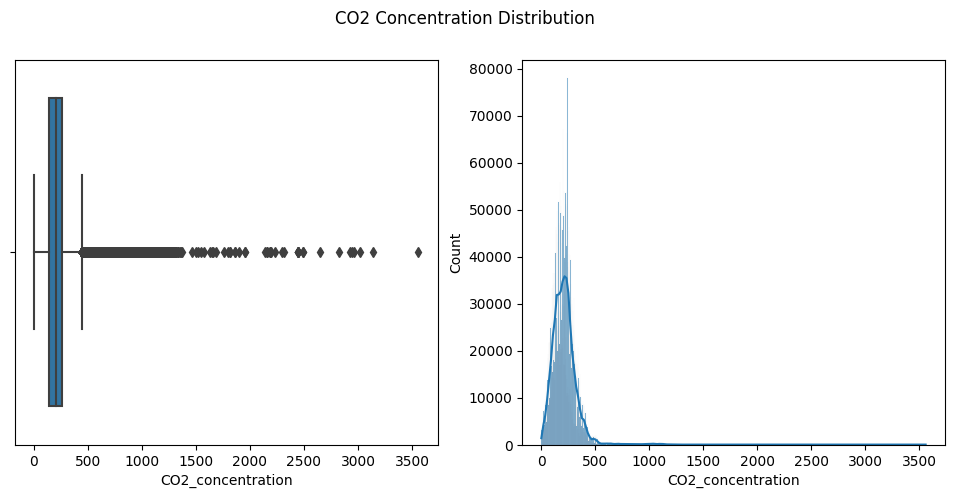

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Create a boxplot
sns.boxplot(data=df2, x='CO2_concentration', ax=axes[0])

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(data=df2, x='CO2_concentration', kde=True, ax=axes[1])

# Set a common title for the entire figure
plt.suptitle('CO2 Concentration Distribution')

# Show the plot
plt.show()

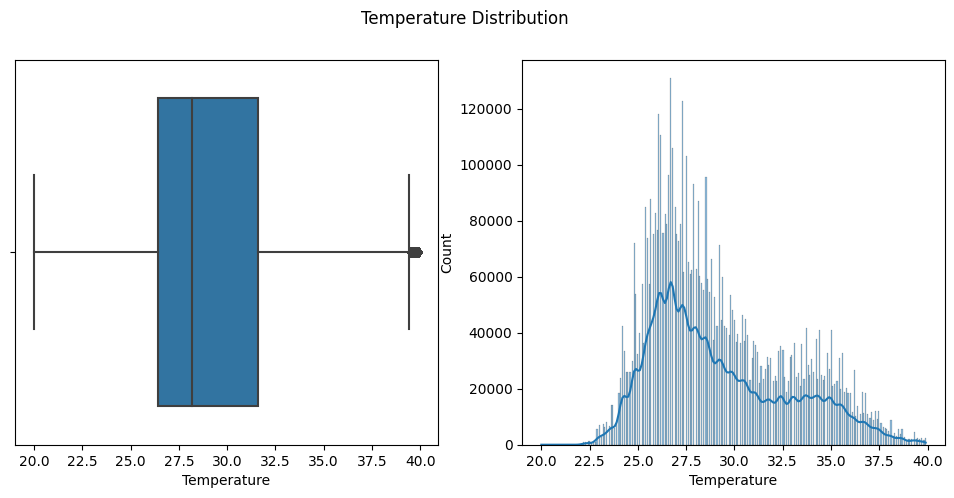

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Create a boxplot
sns.boxplot(data=df2, x='Temperature', orient='h',ax=axes[0])

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(data=df2, x='Temperature', kde=True, ax=axes[1])

# Set a common title for the entire figure
plt.suptitle('Temperature Distribution')

# Show the plot
plt.show()

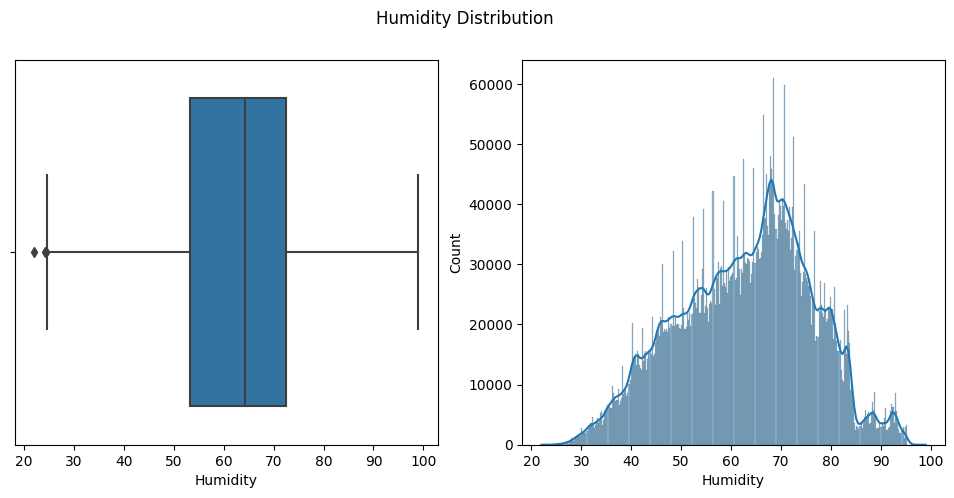

In [16]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Create a boxplot
sns.boxplot(data=df2, x='Humidity', orient='h',ax=axes[0])

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(data=df2, x='Humidity', kde=True, ax=axes[1])

# Set a common title for the entire figure
plt.suptitle('Humidity Distribution')

# Show the plot
plt.show()

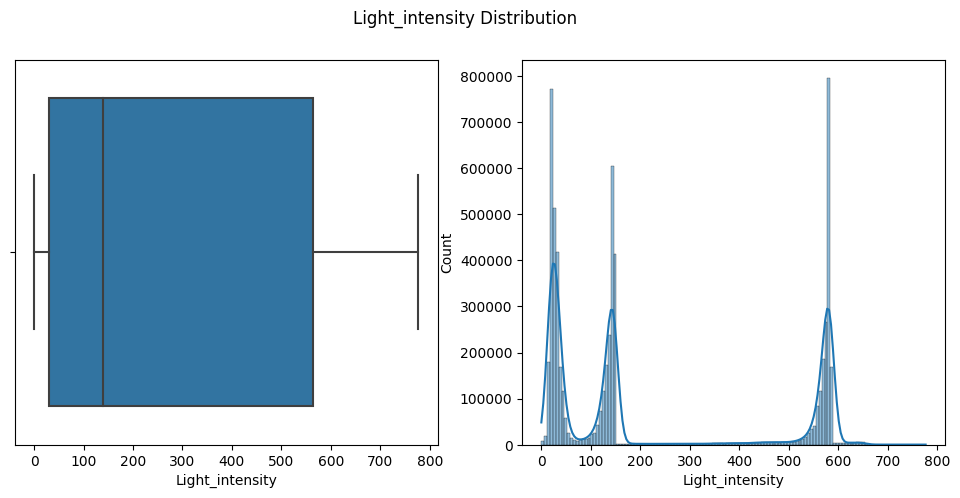

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Create a boxplot
sns.boxplot(data=df2, x='Light_intensity', orient='h',ax=axes[0])

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(data=df2, x='Light_intensity', kde=True, ax=axes[1])

# Set a common title for the entire figure
plt.suptitle('Light_intensity Distribution')

# Show the plot
plt.show()

## correlation with each data features

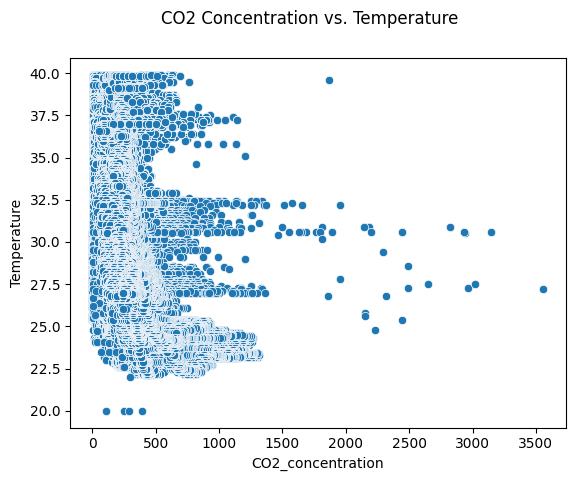

In [18]:
sns.scatterplot(data=df2, y='Temperature', x='CO2_concentration')
plt.suptitle('CO2 Concentration vs. Temperature')
plt.show()

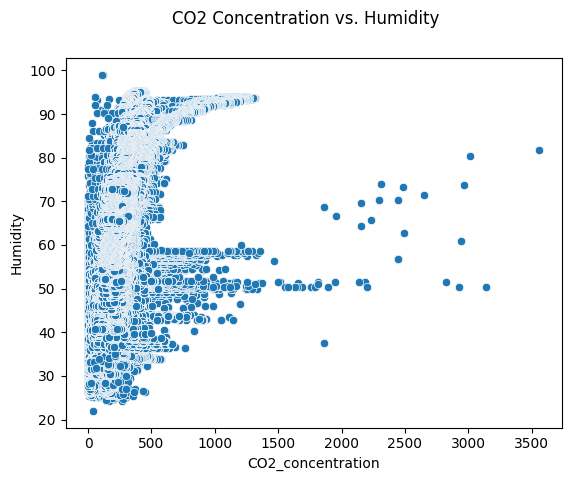

In [19]:
sns.scatterplot(data=df2, y='Humidity', x='CO2_concentration')
plt.suptitle('CO2 Concentration vs. Humidity')
plt.show()

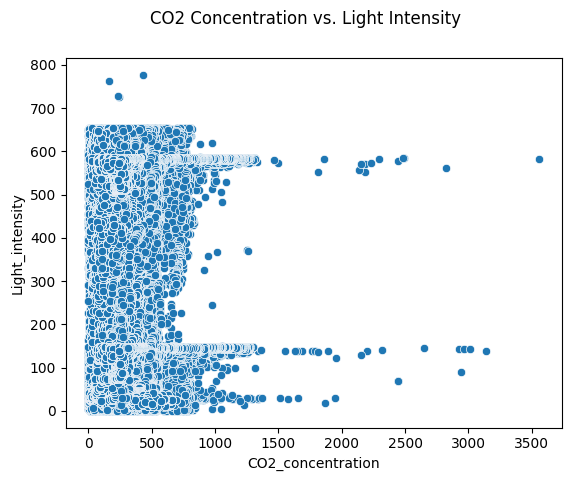

In [20]:
sns.scatterplot(data=df2, y='Light_intensity', x='CO2_concentration')
plt.suptitle('CO2 Concentration vs. Light Intensity')
plt.show()


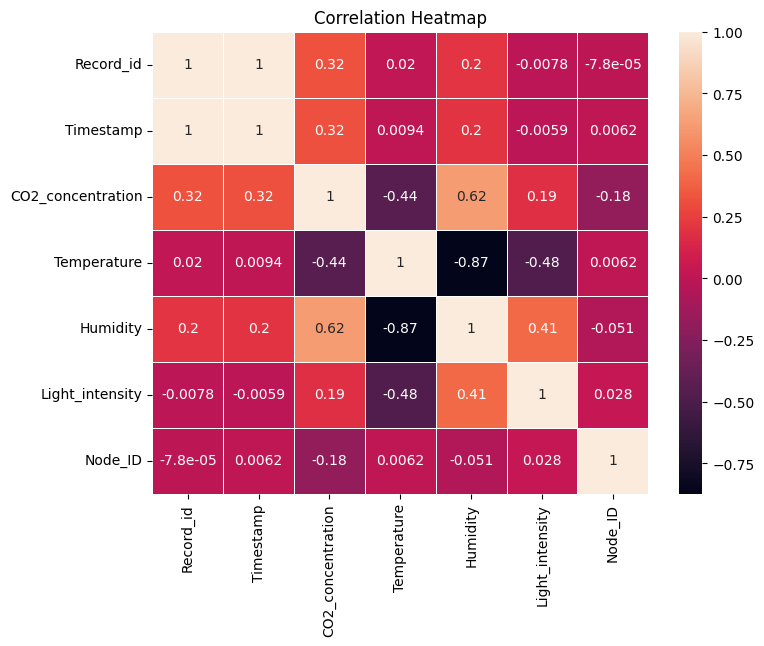

In [21]:
correlation_matrix = df2.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
co2_correlations = correlation_matrix['CO2_concentration']
co2_correlations

Record_id            0.321357
Timestamp            0.315030
CO2_concentration    1.000000
Temperature         -0.440196
Humidity             0.624620
Light_intensity      0.186994
Node_ID             -0.181239
Name: CO2_concentration, dtype: float64

In [23]:
# convert Linux timestamp to regular timestamp
df2['Timestamp'] = df2['Timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

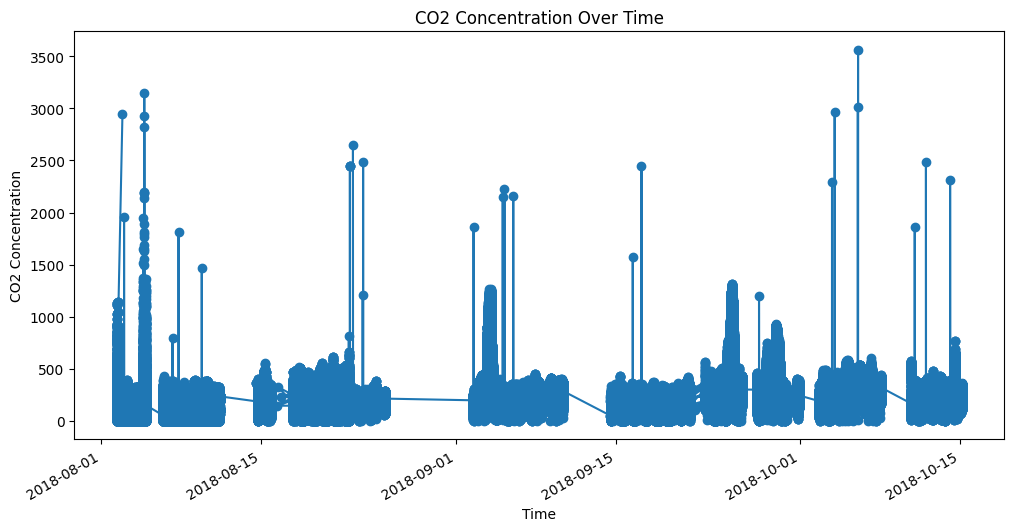

In [24]:
# time with the co2
plt.figure(figsize=(12, 6))
plt.plot(df2['Timestamp'], df2['CO2_concentration'], marker='o', linestyle='-')

# Optionally, format the x-axis to better display datetime values
plt.gcf().autofmt_xdate()  # Auto-rotate the dates on x-axis for better readability

plt.title('CO2 Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')

# Show the plot
plt.show()


In [25]:
# Node_ID is 0, 1, 9, round float to integer
df2['Node_ID'] = round(df2['Node_ID'])

In [26]:
df2

,Record_id,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
0,4678229,2018-08-02 20:55:14,2944.0,30.5,61.0,89.0,9.0
2,8267681,2018-08-02 08:49:11,287.0,27.6,63.8,25.0,0.0
3,8267682,2018-08-02 08:49:12,296.0,27.6,63.8,24.0,0.0
4,8267683,2018-08-02 08:49:13,301.0,27.6,63.8,24.0,0.0
5,8267684,2018-08-02 08:49:14,297.0,27.6,63.8,23.0,0.0
...,...,...,...,...,...,...,...
6116510,14390026,2018-10-15 04:13:50,244.0,27.0,65.5,574.0,1.0
6116511,14390027,2018-10-15 04:13:50,244.0,27.0,65.5,574.0,1.0
6116512,14390035,2018-10-15 04:13:53,246.0,27.0,65.5,138.0,1.0
6116513,14390036,2018-10-15 04:13:53,246.0,27.0,65.5,138.0,1.0


In [27]:
df3 = df2[(df2['CO2_concentration'] > 450)]

In [28]:
df3.to_csv('co2_cleaned.csv', index = False)

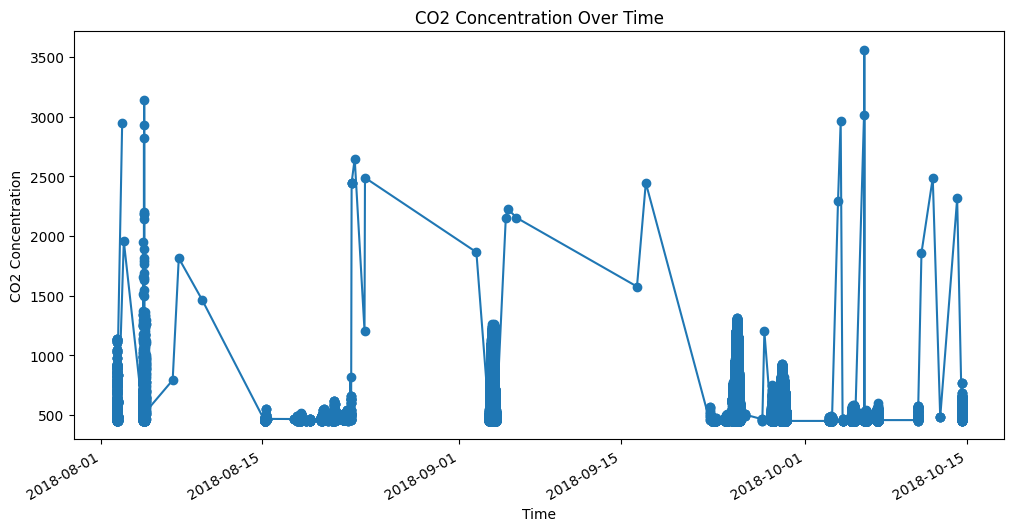

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df3['Timestamp'], df3['CO2_concentration'], marker='o', linestyle='-')

# Optionally, format the x-axis to better display datetime values
plt.gcf().autofmt_xdate()  # Auto-rotate the dates on x-axis for better readability

plt.title('CO2 Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')

# Show the plot
plt.show()

In [30]:
df3

,Record_id,Timestamp,CO2_concentration,Temperature,Humidity,Light_intensity,Node_ID
0,4678229,2018-08-02 20:55:14,2944.0,30.5,61.0,89.0,9.0
1946,8269626,2018-08-02 09:31:29,494.0,36.3,53.1,28.0,9.0
1948,8269628,2018-08-02 09:31:29,494.0,36.3,53.1,28.0,9.0
1949,8269629,2018-08-02 09:31:29,494.0,36.3,53.1,28.0,9.0
2310,8269988,2018-08-02 09:34:27,527.0,37.4,49.1,30.0,9.0
...,...,...,...,...,...,...,...
6033971,14307244,2018-10-14 13:22:55,477.0,37.0,39.6,22.0,1.0
6034019,14307292,2018-10-14 13:23:14,500.0,37.0,39.8,16.0,1.0
6034021,14307294,2018-10-14 13:23:14,500.0,37.0,39.8,16.0,1.0
6034022,14307295,2018-10-14 13:23:14,500.0,37.0,39.8,16.0,1.0
